In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# example dataset
 
# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
 
# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

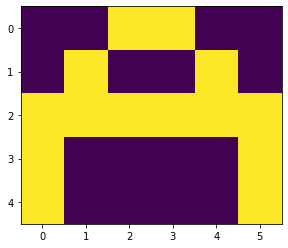

In [34]:
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [35]:
x = [ np.array(a).reshape(1,30), np.array(b).reshape(1,30), np.array(c).reshape(1,30) ]

y = np.array(y)


1st layer: inputs [1,30]
2nd layer: hidden layer [1,5]
3rd layer: outputs [3,3]

In [36]:
# σ activation function, assume sigmoid

def sigmoid(x):
    tmp = 1/(1 + np.exp(-x))
    return tmp

def forward_diff(x, w1, w2):

    #1st hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    # outputs
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    return a2

def random_w(x,y):
    l=[]
    for i in range(x * y):
        l.append(np.random.randn())

    return (np.array(l).reshape(x,y))

def loss(out, Y):
    mat = np.square(out - Y)
    tmp = np.sum(mat)/len(y)
    return tmp

def back_prop(x,y,w1,w2,alpha):

    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2 = a2 - y
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),(np.multiply(a1,1-a1)))

    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    w1 = w1 - alpha * w1_adj
    w2 = w2 - alpha * w2_adj

    return (w1, w2)

def train(x, Y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    losses = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
             out = forward_diff(x[i], w1, w2)
             l.append((loss(out,Y[i])))
             w1, w2= back_prop(x[i], y[i], w1, w2, alpha)
             print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)   

             acc.append((1-(sum(l)/len(x)))*100)
             losses.append(sum(l)/len(x))
    
    return(acc, losses, w1, w2)

def predict(x, w1, w2):
    Out = forward_diff(x, w1, w2)
    maxm = 0
    k = 0
    for i in range (len(Out[0])):
        if maxm<Out[0][i]:
            maxm = Out[0][i]
            k = i
    
    if k==0:
        print("Image is letter A")
    elif k==1:
        print("image is letter B")
    else:
        print("image is lette C")
    
    plt.imshow(x.reshape(5,6))
    plt.show()

    return



    



In [37]:
w1 = random_w(30,5)
w2 = random_w(5,3)

print(w1, "\n\n", w2)

[[ 1.30147183e+00  1.87664043e+00 -2.35935753e-01  7.79908412e-01
  -2.01070524e+00]
 [ 1.95854917e+00  6.76348145e-01 -4.11963026e-01  1.37426933e+00
   1.24509760e+00]
 [ 1.64983727e+00  3.45705350e-02  7.18443659e-01 -2.09413721e+00
  -1.05625480e-01]
 [-3.31187350e-01  1.76746653e+00  4.20745182e-01  6.82039164e-01
  -7.74683534e-02]
 [-9.79401365e-01  7.78374222e-01 -1.73472658e+00 -1.75653753e+00
   5.82018085e-01]
 [ 8.81995776e-01  1.36581420e-01 -8.34276985e-01  1.12073458e+00
  -3.77933132e-01]
 [-1.33129074e+00 -1.93752278e-01 -3.73243305e-01  1.46229567e-01
   1.31193735e-01]
 [-1.83589535e-02  9.37713234e-01  1.01254776e+00  4.67959820e-01
   4.54247692e-01]
 [ 1.93816267e-01 -4.13018484e-01  7.70988240e-01  1.43064108e+00
  -8.77635014e-01]
 [ 2.31531659e-01  9.24272674e-01  3.97715357e-01 -7.56856603e-01
   1.43242912e+00]
 [-6.70081732e-01 -1.29409687e+00  5.61152309e-02  1.52746566e+00
  -7.27723223e-01]
 [-2.33595726e-01  6.99088679e-02  1.44031406e+00  2.40870696e-01

In [38]:
acc, losses, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 82.46332927023245
epochs: 1 ======== acc: 63.20357578039988
epochs: 1 ======== acc: 61.60560137084765
epochs: 2 ======== acc: 83.88850781218125
epochs: 2 ======== acc: 65.93763924190941
epochs: 2 ======== acc: 63.84693055910668
epochs: 3 ======== acc: 85.657752923963
epochs: 3 ======== acc: 69.27798514265513
epochs: 3 ======== acc: 66.59002044496971
epochs: 4 ======== acc: 87.54538112678017
epochs: 4 ======== acc: 72.85520162057742
epochs: 4 ======== acc: 69.52141261127183
epochs: 5 ======== acc: 89.23351825830872
epochs: 5 ======== acc: 76.17686512178275
epochs: 5 ======== acc: 72.22771576413602
epochs: 6 ======== acc: 90.53689524198454
epochs: 6 ======== acc: 78.92297624758295
epochs: 6 ======== acc: 74.45143006983525
epochs: 7 ======== acc: 91.46164770779527
epochs: 7 ======== acc: 81.033178317809
epochs: 7 ======== acc: 76.16192227493187
epochs: 8 ======== acc: 92.10645975768297
epochs: 8 ======== acc: 82.59985967966125
epochs: 8 ======== acc: 77.45332649238